<div style="color:#3c4d5a; border-top: 7px solid #42A5F5; border-bottom: 7px solid #42A5F5; padding: 5px; text-align: center; text-transform: uppercase"><h1>Análisis y transformación de variables categóricas, clasificación y optimización (fine tuning) con redes neuronales - préstamos en instituciones bancarias</h1> </div>

Desarrollado por: Ing. Remigio Hurtado Ortiz, PhD. Correo de contacto: remigiohurtado@gmail.com

En esta práctica aprenderás a desarrollar y optimizar un clasificador mediante Redes Neuronales para predecir si un cliente en un banco es un cliente adecuado (BUENO, es decir, de bajo riesgo) o un cliente no adecuado (MALO, es decir, de alto riesgo) para concederle un crédito. Para ello, utilizaremos un Pipeline que es una herramienta que permite combinar transformadores, clasificadores, regresores u otros estimadores para construir un estimador compuesto. En el Pipeline integraremos pasos de transformación de variables y el clasificador. Además, aprenderás a evaluar y optimizar/ajustar (Tuning) los parámetros (hiperparámetros) del método mediante las funciones de cross_val_score, metrics y GridSearchCV. Finalmente, aprenderás a presentar los resultados en un Heatmap de tal manera que puedas indentificar visualmente los mejores valores de los parámetros.

En este ejemplo seguirás un proceso de análisis de datos en fases: 
- **Fase 1:** preparación de datos 
- **Fase 2:** entrenamiento base de una red neuronal
- **Fase 3:** optimización del modelo de red neuronal (Fine Tuning)
- **Fase 4:** predicción de nuevos samples (nuevos clientes) 

Requisitos: es importante tener conocimientos de Python y de Fundamentos de Machine Learning. Te sugerimos previamente revisar las prácticas de preparación del conjunto de datos que utilizaremos: <a href="https://genscinet.com/analisis-exploratorio/" target="blank">análisis exploratorio </a> y <a href="https://genscinet.com/transformacion-clasificacionknn/" target="blank">transformación de variables categóricas y clasificación con KNN</a>.

Esta práctica está estructurada de la siguiente manera:

- [Fundamentos de Machine Learning (Aprendizaje Automático)](#fundamentos)

- [Fase 1: Preparación de datos](#preparacion-datos)

- [Fase 2: Entrenamiento base de una red neuronal](#entrenamiento-base)

- [Fase 3: Optimización del modelo de red neuronal (Fine Tuning)](#optimizacion)

- [Fase 4: Predicción de nuevos samples (nuevos clientes)](#PrediccionNuevoElemento)

- [Conclusiones](#Conclusiones)

- [Referencias y enlaces](#Referencias-enlaces)

<div id="fundamentos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fundamentos de Machine Learning (Aprendizaje Automático) y Redes Neuronales</h2> </div>

"El aprendizaje automático es una rama en evolución de los algoritmos computacionales que están diseñados para emular la inteligencia humana aprendiendo del entorno circundante. Se les considera el caballo de batalla en la nueva era del Big Data. Las técnicas basadas en el aprendizaje automático se han aplicado con éxito en diversos campos que van desde el reconocimiento de patrones, la visión por computadora, la ingeniería de naves espaciales, las finanzas, el entretenimiento y la biología computacional hasta aplicaciones biomédicas y médicas" [1], [2].

El aprendizaje automático (machine learning) es un subconjunto de la inteligencia artificial y el aprendizaje profundo (deep learning) es un subconjunto del aprendizaje automático. Los modelos de Machine Learning no requieren necesariamente grandes sumas de datos, por lo que pueden resolver problemas menos complicados en un corto período de tiempo [3].

**Tipos de Aprendizaje Automático**

El Aprendizaje Automático puede dividirse en tres categorías principales [4]: 
- **Supervisado (Supervised Learning):** requieren etiquetas (variable de salida o conocida como variable dependiente)
- **No supervisado (Unsupervised Learning):** no requieren etiquetas
- **Por refuerzo (Reinforced Learning)**

**1. Aprendizaje Supervisado:** son los algoritmos de aprendizaje automático más utilizados para el análisis predictivo. Estos algoritmos dependen de conjuntos de datos que fueron procesados por los expertos humanos (por lo tanto, se usa la palabra “supervisión”). Los algoritmos luego aprenden cómo realizar las mismas tareas de procesamiento de forma independiente en los nuevos conjuntos de datos. En particular, los métodos supervisados se utilizan para resolver problemas de regresión y clasificación.

**2. Aprendizaje No Supervisado:** los algoritmos de aprendizaje automático no supervisados no requieren expertos humanos de los que aprender, sino que descubren patrones en los datos de forma autónoma. Algunos ejemplos de problemas resueltos con métodos no supervisados son el agrupamiento (clustering) y la asociación.

**3. Aprendizaje por Refuerzo:** los algoritmos de aprendizaje automático por refuerzo funcionan bajo el siguiente enfoque: por cada paso incorrecto el sistema es castigado (penalizado) y por cada paso correcto el sistema es recompensado.

**Problemas de clasificación:** la variable de salida es discreta. Los grupos o clases son predefinidos. Ejemplos: reconocimiento de imágenes (reconocimiento de números manuscritos, reconocimiento de objetos, reconocimiento de rostros), diagnósticos de las patologías de exámenes médicos (tumor benigno o maligno, cáncer o no cáncer, Parkinson o no Parkinson, diabetes o no diabetes), clasificación de personas según su historial crediticio (confiable o no confiable), reconocimiento de gustos o intereses, por ejemplo, si un producto le gustará (producto recomendado) o no (producto no recomendado) a una persona, afinidades políticas (si una persona votará o no por un candidato),etc. 

**Problemas de regresión:** son el cálculo de las relaciones matemáticas entre una variable continua y una o más variables. La ejecución de la regresión significa encontrar la función que interpola mejor los valores. Una función de regresión permite estimar el valor de una variable dado el valor de otra para los valores que no se han obtenido antes. Ejemplos: posición de un automóvil y su velocidad, estimación del costo de una casa o de un auto, consumo de gasolina en una ciudad, nivel de contaminación, el porcentaje de aceptación de un político en una ciudad o sector, etc.

**Métodos de agrupamiento:** estos se pueden ver como la detección automática (descubrimiento) de grupos de observaciones que tienen características similares, que pueden indicar posiblemente el hecho de que un miembro del grupo pertenece a una clase bien definida. Por ejemplo, los algoritmos de agrupamiento se pueden utilizar en marketing digital para identificar grupos de usuarios basados en su historial de compras en línea, y luego enviar avisos dirigidos a cada miembro. También se puede identificar grupos de productos para conformar y promocionar paquetes y servicios.   

**Métodos de asociación:** estos son un problema muy relevante para los comerciantes en línea, y consisten en detectar grupos de elementos que se observan con frecuencia en conjunto. Ejemplo: sugerir compras adicionales a un usuario según el contenido de su carrito de compras. Otro ejemplo sería identificar relaciones entre productos para formar secuencias de productos que maximicen el beneficio para las tiendas y para los clientes.

**Aplicaciones del Aprendizaje Automático**

- Marketing: Acertar en la toma de decisiones. La demanda de una tienda en concreto, permitiendo optimizar el inventario y el personal
- Marketing Personalizado / Sistemas de Recomendación: descubrir mercados, analizar comportamientos, predecir ventas
- Detección de Fraude: transacciones ilícitas, lavado de activos
- Reconocimiento de Imágenes: digitalización de textos, reconocimiento de manuscritos (handwriting)
- Reconocimiento de Rostros: seguridad con cámaras para mitigar la delincuencia
- Bolsa de Valores: predecir tendencias
- Comercio Financiero: análisis financiero. Predecir stock para tomar decisiones de compra, venta
- Atención al Cliente: con Procesamiento de Lenguaje Natural (NLP) y Chatbots contextuales
- Predicción de Enfermedades
- Cybersecurity: detección de Malware, Spam, etc.
- Evaluación de Riesgos: clasificación de usuarios - nivel de riesgo (en seguros, préstamos) 
- Tendencias en Política
- Infraestructura y Networking: en Redes Basadas en Intención (IBN) el reconocimiento de intenciones y aseguramiento de servicios
- Ecommerce (la inteligencia artificial impacta al comercio online y el offline): recomendaciones de compra y optimización de logística (planificación de rutas de reparto).

**Clasificación de algoritmos de Aprendizaje Automático**

Jason Brownlee en 2019 publicó una clasificación muy clara de los algoritmos de aprendizaje automático. A continuación, se presenta dicha clasificación de los principales algoritmos por categorías [5]. 

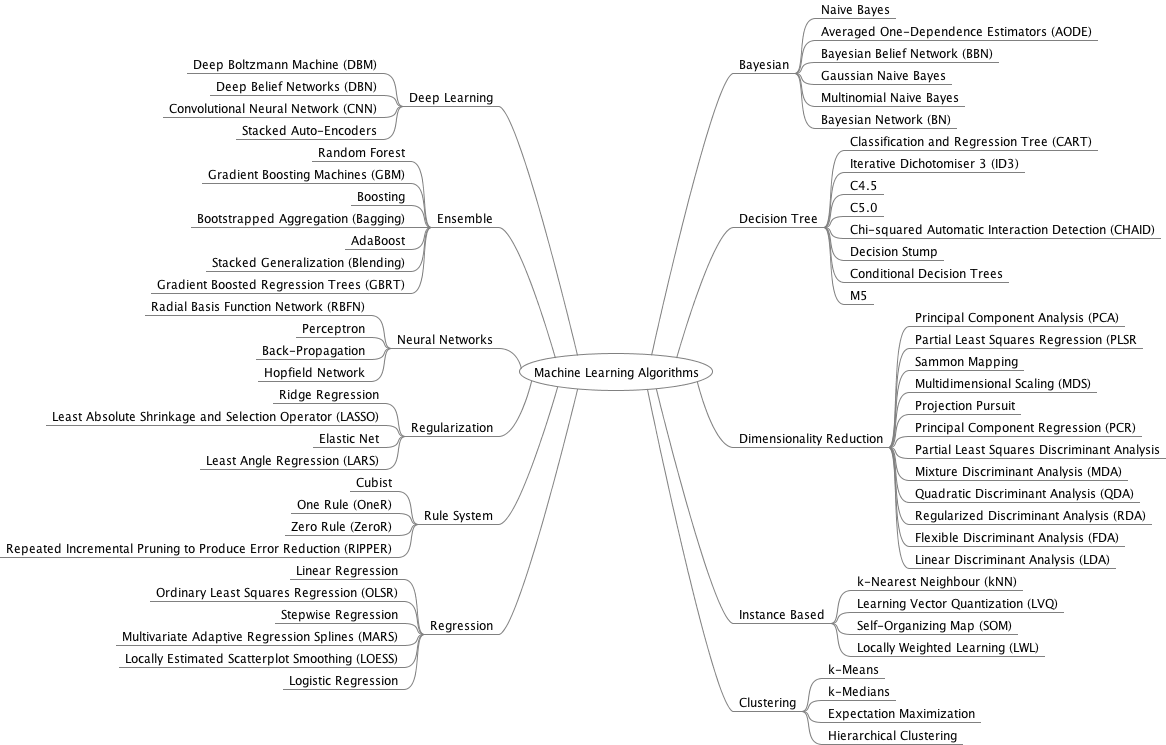

**Fundamentos de Redes Neuronales**

Una Red Neuronal es un algoritmo cuyo propósito es imitar el funcionamiento del cerebro humano con la capacidad de “aprender” y "memorizar a corto y largo plazo" [4]. Las neuronas por si solas son inútiles, son como las hormigas, tienen que vivir en colonia, millones de hormigas pueden armar una colonia, y lo mismo pasa con las neuronas, si trabajan juntas, pueden lograr cosas fantásticas.

Warren McCulloch and Walter Pitts publicaron el primer concepto de una simplificación de una celda del cerebro, la neurona llamada McCulloch-Pitts(MCP), en 1943 [6]. McCulloch y Pitts describieron una neurona con una simple lógica con salida binaria, múltiples señales de entrada en las dendritas son integradas en el cuerpo de la neurona, y, si la señal acumulada excede cierto umbral (threshold), una señal de salida es generada y será pasada por el axon.

Entonces ¿Las neuronas cómo trabajan juntas?
 
Las dendritas reciben información, y el axón transmite esta información (impulsos eléctricos) a las dendritas de la otra neurona. A esta transmisión de información se le llama sinapsis. Millones de neuronas forman la red neuronal humana.

Frank Rosenblatt publicó el primer concepto de la regla de aprendizaje del **Perceptrón** basada en el modelo de la neurona MCP [6]. Con esta regla, Rosenblatt propuso un algoritmo que automáticamente aprendería los coeficientes de los pesos que son multiplicados con las características de entrada a fin de decidir si la neurona se enciende o no. En un problema de clasificación, este algoritmo serviría para predecir si una observación pertenece a una clase o a otra.

**Convergencia:** La convergencia es garantizada si las dos clases son linealmente separables y la tasa de aprendizaje es pequeña. Si las dos clases no pueden ser linealmente separables por un umbral de decisión, entonces, necesitaremos un número máximo de pasos sobre el conjunto de entrenamiento (epochs) y/o límite de cantidad de clasificaciones incorrectas toleradas, caso contrario, la red nunca pararía de actualizar los pesos (bucle infinito).

**Adaptive Linear Neuron (Adaline):** por Bernard Widrow y Tedd Hoff

Perceptrón: ajuste de pesos basado en “unit step function”.
Adaline: ajuste de pesos basado en “linear activation function”.

Adaline ilustra los conceptos clave de definir y minimizar la función de costo. Esto sienta las bases para entender algoritmos avanzados de ML para clasificación, como regresión logística, support vector machines, y modelos de regresión [6].

**Aprendizaje:**

Los “pesos” son los componentes cruciales dentro de una red neuronal artificial, porque las redes neuronales artificiales aprenden ajustando estos valores. Estos valores deciden en cada caso que señal es importante, o cual no, que señal pasa o que señal no. Los pesos se ajustan para obtener los resultados que esperamos. 

La **función de activación** determina el comportamiento de las salidas de cada capa, es decir, escoge que valor pasa o no pasa. Saber escoger una función de activación es fundamental.

**Capas:** Todas las neuronas de la capa anterior irán conectadas a todas las neuronas de la capa siguiente, lo que aumenta la capacidad de predecir un valor, mejora mucho el modelo, pero no se garantiza mejores resultados por tener más capas intermedias. Mientras más capas intermedias agreguemos, más nivel de abstracción tendrá nuestra red. 

Una red neuronal es una herramienta que tiene la ventaja de “entender” los datos que uno le presenta, y hacer una función que se ajuste a nuestro X (entradas). Ejemplo: tenemos imágenes de perros y gatos, la red neuronal va a extraer todos los patrones de la imagen que diferencian a un perro y un gato, así cuando proporcionemos una nueva imagen de un perro, la red neuronal con todas las reglas que aprendió podrá “entender” de que animal se trata.

**Evaluación:** Al final de cada epoch, el modelo compara las predicciones de Y con los valores reales de Y, y esta comparación se hace a través de la función de pérdida. Esta función indica cuánto es el margen de error en nuestra red, y nuestro objetivo es minimizar esa función, es decir, que el margen este lo mas cercano posible a cero. La función más popular es MSE.

**Forward Propagation:** un valor de entrada pasa por toda la red hasta la salida, y se calcula la función de perdida, luego de este proceso, la pérdida se debe propagar hacia atrás (**Backpropagation**) ajustando los valores de los pesos. El Backpropagation es un algoritmo avanzado basado en matemáticas muy interesantes y sofisticadas, y nos permite ajustar todos los pesos simultáneamente. Todos los pesos de la red se deben ajustar al mismo tiempo, para que los valores sean consistentes, esta es la clave para que el algoritmo funcione.

<div id="preparacion-datos" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 1: Preparación de datos</h2> </div>

<div id="Importacion" style="color:#106ba3"><h3>Importación de librerías</h3> </div>

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 

from time import time
from datetime import datetime, timedelta

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
import seaborn as sns
import copy

from sklearn.model_selection import train_test_split
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.models import model_from_json
from keras.models import load_model

from sklearn import metrics 
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import set_config   

print("Módulos y clases importados")

Módulos y clases importados


<div id="Carga-descripcion" style="color:#106ba3"><h3>Carga y descripción del dataset</h3> </div>

Nombre del dataset: Statlog (German Credit Data).
Enlace: http://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data) [7].

Descripción general: este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como riesgos crediticios buenos o malos.

Número de Variables (o atributos): 21

Número de instancias (clientes en el banco): 1000

Salida: TIPOCLIENTE (BUEN CLIENTE O BAJO RIESGO:1, MAL CLIENTE O ALTO RIESGO:2)

In [2]:
nombresVariables=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
                  'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
                  'ACTIVOS','EDAD','OTROSPLANESPAGO','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO',
                  'CANTIDADPERSONASAMANTENER','TELEFONO','TRABAJADOREXTRANJERO','TIPOCLIENTE']
#Cargar un dataframe desde una URL
dataframe = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', sep = ' ', 
                         names=nombresVariables)
#Cargar un dataframe de un archivo local
#dataset = "Datasets/german.data"
#dataframe = pd.read_csv(dataset, sep = ' ', names=nombresVariables)

print('cantidad de observaciones (clientes): ',dataframe.shape[0])
print('cantidad de variables: ',dataframe.shape[1])
print(dataframe.shape)
dataframe.head()

cantidad de observaciones (clientes):  1000
cantidad de variables:  21
(1000, 21)


,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,...,ACTIVOS,EDAD,OTROSPLANESPAGO,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TELEFONO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


<div id="formato-salida" style="color:#106ba3"><h3>Formato a la variable de salida</h3> </div>

In [3]:
#Se modifica la variable de salida (de estudio): TIPOCLIENTE. Es mejor tener la salida en formato binario cuando hay dos clases
dataframe['TIPOCLIENTE'] = dataframe['TIPOCLIENTE'].replace(2, 0)
dataframe.head()

,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,...,ACTIVOS,EDAD,OTROSPLANESPAGO,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TELEFONO,TRABAJADOREXTRANJERO,TIPOCLIENTE
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


<div id="eliminacion-variables" style="color:#106ba3"><h3>Eliminación de variables y separación de variable de salida</h3> </div>

In [4]:
#Se separa la variable de salida "Y" para poder realizar la preparación de datos a las variables independiente "X" 
Y=dataframe['TIPOCLIENTE']
dataframe=dataframe.drop(['OTROSPLANESPAGO'], axis=1)
dataframe=dataframe.drop(['TELEFONO'], axis=1)
dataframe=dataframe.drop(['TIPOCLIENTE'], axis=1)
print(dataframe.shape)
dataframe.head()

(1000, 18)


,ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A152,2,A173,1,A201
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A152,1,A173,1,A201
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A152,1,A172,2,A201
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A153,1,A173,2,A201
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A153,2,A173,2,A201


<AxesSubplot: xlabel='TIPOCLIENTE', ylabel='count'>

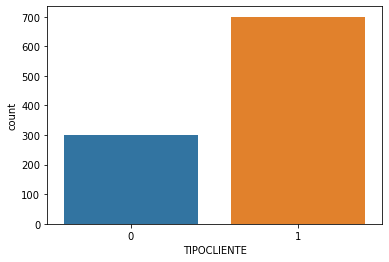

In [5]:
#Se genera una figura de frecuencia de clase, es decir, la cantidad de muestras en cada clase.
sns.countplot(x=Y)

<div id="analisis-variables" style="color:#106ba3"><h3>Análisis de variables categóricas</h3> </div>

Si tienes el pipeline de preprocesamiento generado previamente al seguir la guía "<a href="https://genscinet.com/transformacion-clasificacionknn/" target="blank">transformación de variables categóricas y clasificación con KNN</a>", puedes directamente continuar en la [Fase 2: Entrenamiento base de una red neuronal](#entrenamiento-base) de esta práctica.  

In [6]:
#Determinación de tipos de variables
categorical_ordinal_features = ['ESTADOCUENTACORRIENTE','HISTORIALCREDITO','SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO',
                                'ESTADOCIVILYSEXO','ACTIVOS','VIVIENDA','EMPLEO']
categorical_nominal_features = ['PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO']
numeric_features = ['PLAZOMESESCREDITO','MONTOCREDITO','TASAPAGO','TIEMPORESIDENCIAACTUAL','EDAD','CANTIDADCREDITOSEXISTENTES',
                    'CANTIDADPERSONASAMANTENER']

In [7]:
def analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features):
    cantidadTotalVariables = len(dataframe.columns) 
    print('Cantidad de variables antes de transformación de variables: ',cantidadTotalVariables)
    cantidadVariablesNominales = len(categorical_nominal_features)
    cantidadVariablesBinarias=0
    for variable in categorical_nominal_features:
        cantidadCategorias=dataframe[variable].nunique()
        cantidadVariablesBinarias=cantidadVariablesBinarias+cantidadCategorias
        print('Cantidad de categorías en la variable categórica nominal',variable,':',cantidadCategorias)
    print('Cantidad de variables binarias que reemplazarán a las variables categóricas nominales: ',cantidadVariablesBinarias)
    cantidadTotalVariablesConTransformacion = cantidadTotalVariables - cantidadVariablesNominales + cantidadVariablesBinarias
    return cantidadTotalVariablesConTransformacion

In [8]:
cantidadTotalVariablesConTransformacion=analisisVariables(dataframe, categorical_ordinal_features, categorical_nominal_features)
print('Cantidad de variables que habrá después de la transformación de variables: ',cantidadTotalVariablesConTransformacion)

Cantidad de variables antes de transformación de variables:  18
Cantidad de categorías en la variable categórica nominal PROPOSITOCREDITO : 10
Cantidad de categorías en la variable categórica nominal GARANTE : 3
Cantidad de categorías en la variable categórica nominal TRABAJADOREXTRANJERO : 2
Cantidad de variables binarias que reemplazarán a las variables categóricas nominales:  15
Cantidad de variables que habrá después de la transformación de variables:  30


Hay 3 variables categóricas nominales: 'PROPOSITOCREDITO','GARANTE','TRABAJADOREXTRANJERO'. Estas 3 variables categóricas nominales deben ser reemplazadas por variables binarias.

**PROPOSITOCREDITO:** En principio son 11 categorías. Una categoría (A47) no se aplica puesto que no hay clientes con dicha categoría. Por lo tanto, para PROPOSITOCREDITO quedan 10 categorías, que darán lugar a 10 variables binarias por el proceso de transformación binaria.

- A40 : carro (nuevo)
- A41 : car (usado)
- A42 : mueble/equipo
- A43 : radio/televisión
- A44 : electrodomésticos
- A45 : reparaciones
- A46 : educación
- A47 : (vacaciones) -> en el dataset no hay un cliente que haya pedido un crédito para vacaciones
- A48 : reciclaje
- A49 : negocios
- A410 : otros

**GARANTE:** (A101 : ninguno, A102 : co-aplicante, A103 : garante) = 3 categorías que darán 3 variables binarias

**TRABAJADOREXTRANJERO:** (A201 : yes, A202 : no) = 2 categorías que darán 2 variables binarias

cantidadVariablesBinarias = 10+3+2=15 variables binarias en total

Las 3 variables categóricas nominales serán reemplazadas por las 15 variables binarias

Por lo tanto,

A las 18 variables iniciales se eliminarán las 3 variables categóricas nominales y se agregarán las 15 variables binarias.

18-3+15=30 variables

El dataframe luego de la transformación categórica a numérica tendrá 30 variables. 

<div id="diseño-transformadores" style="color:#106ba3"><h3>Diseño de transformadores</h3> </div>

Por medio de un Pipeline creamos un estimador compuesto. Esta herramienta nos permite combinar preprocesadores y transformadores para llevar un orden y estructura en el proceso de transformación de variables. Para una mejor organización creamos los preprocesadores y sus métodos de transformación.

In [10]:
#Definición de transformadores (preprocesadores)

#1. Preprocesador de variables categóricas a numéricas (ordinales y nominales)
categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())])
categorical_nominal_transformer_ConNombres = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse = False, handle_unknown = "ignore"))])# se ignorará una categoría desconocida
preprocesorCategoricoNumericoConNombres = ColumnTransformer(
    transformers=[
        ('catord', categorical_ordinal_transformer, categorical_ordinal_features),
        ('catnom', categorical_nominal_transformer_ConNombres, categorical_nominal_features)
    ],remainder='passthrough',n_jobs=-1)

#2. Normalización y Scaling: Preprocesador de variables numéricas con transformación MinMaxScaler
minmax_transformer = Pipeline(steps=[
    ('minmax', MinMaxScaler(feature_range=(0, 1)))])
preprocesorMinMax = ColumnTransformer(transformers =[
    ('tranminmax', minmax_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#3. Estandarización: Preprocesador de variables numéricas con transformación StandardScaler
standardscaler_transformer = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=True,with_std=True))])
preprocesorStandardScaler = ColumnTransformer(transformers =[
    ('transcaler', standardscaler_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

#4. Preprocesador de variables numéricas con transformación SimpleImputer
simpleimputer_transformer = Pipeline(steps=[
    ('simpleimputer', SimpleImputer(strategy='median')) #otras: strategy='constant', strategy='most_frequent'
])
preprocesorSimpleImputer = ColumnTransformer(transformers =[
('transimpleimputer', simpleimputer_transformer, list(range(cantidadTotalVariablesConTransformacion)))
], remainder ='passthrough')

<div id="diseño-pipeline" style="color:#106ba3"><h3>Diseño de pipeline</h3> </div>

El procesador 'prepcn' es indispensable que se aplique antes de los demás preprocesadores numéricos. En el Pipeline "pipe" se aplica primeramente la tansformación de variables categóricas a variables numéricas y en segundo lugar se aplica la transformación numérica. 

In [11]:
#Construcción de Pipeline con transformadores
pipe = Pipeline(steps=[
    ('prepcn', preprocesorCategoricoNumericoConNombres), 
    ('prepstandard', preprocesorStandardScaler)
    #('prepminmax', preprocesorMinMax)
])

<div id="transformacion-variables" style="color:#106ba3"><h3>Transformación de variables</h3> </div>

In [12]:
#Se ejecuta el pipeline
dataframeTransformado=copy.deepcopy(dataframe)
X_Transformado = pipe.fit_transform(dataframeTransformado)
print('********** Pipeline aplicado')
print('********** Transformador categórico nominal:')
print(pipe.named_steps['prepcn'].transformers_[1])
#Formación de dataframe transformado
cnamesDataset1=[]
if len(categorical_ordinal_features)!=0:
    cnamesDataset1.extend(categorical_ordinal_features)
if len(categorical_nominal_features)!=0:
    #nos ubicamos primeramente en el paso "prepcn" 
    #luego, en el transformador "catnom" que está en [1] y luego en "onehot", por eso [1][1] 
    cnamesDataset2 = pipe.named_steps['prepcn'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_nominal_features)
    cnamesDataset1.extend(cnamesDataset2)
cnamesDataset3 = numeric_features
cnamesDataset1.extend(cnamesDataset3)
print('********** Cantidad de variables:', len(cnamesDataset1))
print('********** Lista de variables:')
print(cnamesDataset1)
dataframeTransformado = pd.DataFrame(data=X_Transformado,columns=cnamesDataset1)
#Guardar el dataset sin etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoSinEtiquetas.csv", sep=";",index = False)
#Se agrega la variable de salida (etiquetas) al final
dataframeTransformado = pd.concat([dataframeTransformado, Y], axis = 1)
#Guardar el dataset con etiquetas como csv
dataframeTransformado.to_csv("DatasetTransformadoConEtiquetas.csv", sep=";",index = False)
dataframeTransformado.head()

********** Pipeline aplicado
********** Transformador categórico nominal:
('catnom', Pipeline(steps=[('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))]), ['PROPOSITOCREDITO', 'GARANTE', 'TRABAJADOREXTRANJERO'])
********** Cantidad de variables: 30
********** Lista de variables:
['ESTADOCUENTACORRIENTE', 'HISTORIALCREDITO', 'SALDOCUENTAAHORROS', 'TIEMPOACTUALEMPLEO', 'ESTADOCIVILYSEXO', 'ACTIVOS', 'VIVIENDA', 'EMPLEO', 'PROPOSITOCREDITO_A40', 'PROPOSITOCREDITO_A41', 'PROPOSITOCREDITO_A410', 'PROPOSITOCREDITO_A42', 'PROPOSITOCREDITO_A43', 'PROPOSITOCREDITO_A44', 'PROPOSITOCREDITO_A45', 'PROPOSITOCREDITO_A46', 'PROPOSITOCREDITO_A48', 'PROPOSITOCREDITO_A49', 'GARANTE_A101', 'GARANTE_A102', 'GARANTE_A103', 'TRABAJADOREXTRANJERO_A201', 'TRABAJADOREXTRANJERO_A202', 'PLAZOMESESCREDITO', 'MONTOCREDITO', 'TASAPAGO', 'TIEMPORESIDENCIAACTUAL', 'EDAD', 'CANTIDADCREDITOSEXISTENTES', 'CANTIDADPERSONASAMANTENER']


,ESTADOCUENTACORRIENTE,HISTORIALCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,ESTADOCIVILYSEXO,ACTIVOS,VIVIENDA,EMPLEO,PROPOSITOCREDITO_A40,PROPOSITOCREDITO_A41,...,TRABAJADOREXTRANJERO_A201,TRABAJADOREXTRANJERO_A202,PLAZOMESESCREDITO,MONTOCREDITO,TASAPAGO,TIEMPORESIDENCIAACTUAL,EDAD,CANTIDADCREDITOSEXISTENTES,CANTIDADPERSONASAMANTENER,TIPOCLIENTE
0,-1.254566,1.344014,1.833169,1.338078,0.449326,-1.293723,0.133710,0.146949,-0.552705,-0.338862,...,0.196014,-0.196014,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1
1,-0.459026,-0.503428,-0.699707,-0.317959,-0.963650,-1.293723,0.133710,0.146949,-0.552705,-0.338862,...,0.196014,-0.196014,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0
2,1.132053,1.344014,-0.699707,0.510060,0.449326,-1.293723,0.133710,-1.383771,-0.552705,-0.338862,...,0.196014,-0.196014,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,1
3,-1.254566,-0.503428,-0.699707,0.510060,0.449326,-0.341055,2.016956,0.146949,-0.552705,-0.338862,...,0.196014,-0.196014,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1
4,-1.254566,0.420293,-0.699707,-0.317959,0.449326,1.564281,2.016956,0.146949,1.809283,-0.338862,...,0.196014,-0.196014,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,0


In [65]:
# Funciones para guardar y cargar un Pipeline o Modelo
def guardarPipeline(pipeline,nombreArchivo):
    with open(nombreArchivo+'.pickle', 'wb') as handle:
        pickle.dump(pipeline, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [66]:
guardarPipeline(pipe,'pipePreprocesadores')

<div id="entrenamiento-base" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 2: Entrenamiento base de una red neuronal</h2> </div>

<div id="carga-pipeline" style="color:#106ba3"><h3>Carga de pipeline de preparación del conjunto de datos</h3> </div>

Se puede cargar un Pipeline creado previamente para la preparación de los datos de este dataset. 

In [6]:
def cargarPipeline(nombreArchivo):
    with open(nombreArchivo+'.pickle', 'rb') as handle:
        pipeline = pickle.load(handle)
    return pipeline

In [7]:
nombreArchivoPreprocesador='pipePreprocesadores'
pipe=None
pipe=cargarPipeline(nombreArchivoPreprocesador) #Debes incluir el archivo del Pipeline en el mismo directorio del script 
cantidadPasos=len(pipe.steps)
print("Cantidad de pasos: ",cantidadPasos)
set_config(display='diagram')
pipe

Cantidad de pasos:  2


Pipeline(steps=[('prepcn',
                 ColumnTransformer(n_jobs=-1, remainder='passthrough',
                                   transformers=[('catord',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder())]),
                                                  ['ESTADOCUENTACORRIENTE',
                                                   'HISTORIALCREDITO',
                                                   'SALDOCUENTAAHORROS',
                                                   'TIEMPOACTUALEMPLEO',
                                                   'ESTADOCIVILYSEXO',
                                                   'ACTIVOS', 'VIVIENDA',
                                                   'EMPLEO']),
                                                 ('catnom',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['PROPOSITOCREDITO',
                                                   'GARANTE',
                                                   'TRABAJADOREXTRANJERO'])])),
                ('prepstandard',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('transcaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28,
                                                   29])]))])

In [14]:
import keras
#Funciones para guardar y cargar la Red Neuronal (Arquitectura y Pesos)
def guardarNN(model,nombreArchivo):
    print("Guardando Red Neuronal en Archivo")  
    model.save(nombreArchivo+'.h5')
    print("Red Neuronal Grabada en Archivo")   
    
#Función para cargar red neuronal
def cargarNN(nombreArchivo):
    #model = load_model(nombreArchivo+'.h5')   
    model = keras.models.load_model(nombreArchivo+'.h5')
    print("Red Neuronal Cargada desde Archivo") 
    return model

**Parámetros principales de una Red Neuronal**

En Python con Keras para crear una Red Neuronal se requiere definir fundamentalmente los siguientes parámetros: 

**epochs:** cantidad de veces (pasos) que se repite el proceso de forward y back propagation

**batch_size:** cantidad de muestras para aplicar el ajuste de pesos. 

**optimizer:** es el tipo de algoritmo de descenso del gradiente que nos ayudará a determinar hacia donde mover los pesos. Optimizadores disponibles: SGD, RMSprop, Adam, Adadelta, Adagrad, Adamax, Nadam y Ftrl. 

Para profundizar en Keras puedes revisar su documentación. 

**Modificación de un Pipeline**

En un Pipeline se puede agregar y eliminar sus elementos. Para ello, las funciones más importantes son:

**insert:** agrega un paso (step) antes del paso con el índice dado

**append:** agrega un paso al final del Pipeline
    
**pop:** elimina y retorna el paso con el índice dado (por defecto es el último, es decir, index=-1).

Puedes revisar las demás funciones con: help(pipe.steps) 

Para profundizar en la modificación de Pipelines puedes revisar la referencia [8].

<div id="creacion-redneuronal" style="color:#106ba3"><h3>Creación de la Red Neuronal</h3> </div>

A continuación, creamos la Red Neuronal. Luego, agregamos el clasificador al final del Pipeline.

In [9]:
#Se identifica la cantidad de variables para crear la capa de entrada de la red neuronal
nombrePrep='prepstandard'#prepcn, prepminmax, prepstandard
cantidadVariablesIndependientes = len(pipe.named_steps[nombrePrep].transformers_[0][2])
print("\nCantidad de variables después de preprocesamiento: ",cantidadVariablesIndependientes)


Cantidad de variables después de preprocesamiento:  30


In [17]:
model = Sequential()

#La primera capa Dense recibe el numero de variables, que es la segunda dimensión del dataframe
#La primera capa tiene 3 neuronas. La función de activación es la función rectificadora.
model.add(Dense(3, input_shape=(cantidadVariablesIndependientes,), activation='relu'))
#La capa de salida tiene 1 neurona. La capa de salida debe tener la misma dimensión como de cantidad de salidas queremos,
#por ejemplo, en este caso la salida "TIPOCLIENTE" solo requiere un valor: 0 o 1, entonces 1 neurona es suficiente. 
#La función de activación es sigmoid para calcular la clasificación en términos de probabilidad.
model.add(Dense(1, activation='sigmoid'))

#Como tenemos dos posibles valores de salida "0 o 1", vamos a escoger que el error lo trate como una clasificación binaria.
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

#Se inserta el modelo como paso final del pipeline
pipe.steps.append(['modelNN',model])
#Aquí en lugar del clasificador de Red Neuronal podría ser otro modelo como un Random Forest, una SVM, etc.

#También se pudo haber insertado el modelo indicando el índice (el número de paso específico dentro del pipeline)
#pipe.steps.insert(cantidadPasos,['modelNN',model])

#Se puede eliminar un paso específico del pipeline de la siguiente manera
#pipe.steps.pop(2)

print("Cantidad de pasos: ",len(pipe.steps))

#Mostrar el resumen de la arquitectura de la red neuronal. 
pipe.named_steps['modelNN'].summary()

Cantidad de pasos:  3
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 93        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


"**Param #**" indica la cantidad de parámetros necesarios en dicha capa para almacenar la información de los pesos y las salidas. Por ejemplo, la primera capa que consta de 30 variables de entrada y 3 neuronas, requiere 90 parámetros para las conexiones entre las entradas y las neuronas (30x3=90). A esto se suma 3 parámetros adicionales, ya que se genera 3 salidas, una por cada neurona. En total, en la primera capa se necesita **93 parámetros**. 

Las salidas de la primera capa son las entradas de la segunda capa. Debido a esto, la segunda consta de 3 entradas y 1 neurona, por lo cual requiere 3 parámetros (3x1=3). A esto se suma 1 parámetro adicional, ya que se genera 1 salida. En total, en la capa de salida se necesita **4 parámetros**. 

Y en total, en la red neuronal se requiere **97 parámetros** (93+4=97).

**Sugerencias de función de activación de la última capa y de forma de predicción:**

- Predicción con 'np.argmax(model.predict(x), axis=-1)', si el modelo realiza clasificación multi-clase. Función de activation 'softmax' en la última capa

- Predicción con '(model.predict(x) > 0.5).astype("int32")', si el modelo realiza clasificación binaria. Función de activation 'sigmoid' en la última capa

<div id="entrenamiento-base" style="color:#106ba3"><h3>Entrenamiento de la Red Neuronal</h3> </div>

Para el entrenamiento y testing del modelo se genera las particiones del conjunto de datos en X_train, X_test, y_train, y_test. Convencionalmente, el 80% es para entrenamiento y el 20% es para testing. Más adelante veremos que parte del conjunto de entrenamiento se puede separar para validación (ajuste/optimización de hiperparámetros del modelo).

In [18]:
Yval=Y.values
X=copy.deepcopy(dataframe)

X_train, X_test, y_train, y_test = train_test_split(X, Yval, test_size = 0.2)#random_state = 0
pipe.fit(X_train, y_train, modelNN__epochs=10, modelNN__batch_size=50, modelNN__verbose=0)#modelNN__validation_split=0.1, modelNN__batch_size=10

print('Modelo base entrenado')

Modelo base entrenado


In [19]:
guardarNN(model,'modeloRedNeuronalBase')
print('Modelo Base Guardado')

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Modelo Base Guardado


<AxesSubplot: ylabel='count'>

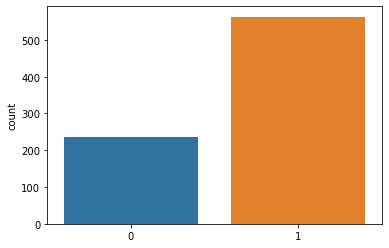

In [20]:
sns.countplot(x=y_train)

<div id="PrediccionEvaluacionMetricas" style="color:#106ba3"><h3>Predicción con modelo base y evaluación de calidad: MAE, MSE, RMSE, Accuracy, Precision, Recall y F1</h3> </div>

In [21]:
y_pred = (pipe.predict(X_test) > 0.5).astype("int32")
y_pred=y_pred.flatten()# de 2D a 1D

7/7 [==============================] - 0s 5ms/step


In [22]:
dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

dataframeFinal.head(20)

,real,predicción
0,1,1
1,1,0
2,1,1
3,0,1
4,1,1
5,1,0
6,0,1
7,1,1
8,1,1
9,1,1


Para revisar definiciones y ejemplos de las métricas Precision, Recall, F1 y Accuracy en clasificación puedes revisar la referencia [9]. 

In [23]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 
print('Accuracy: ' + accuracy) 

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)  
print(cm)  
tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()  
print(tn,fp,fn,tp)

precision=precision_score(y_test_transformado, y_pred_transformado)
precision=str(round(precision, 4))
print('Precision:',precision)

recall=recall_score(y_test_transformado, y_pred_transformado)
recall=str(round(recall, 4))
print('Recall:',recall)

f1=f1_score(y_test_transformado, y_pred_transformado)
f1=str(round(f1, 4))
print('F1:',f1)

Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.6
Accuracy: 0.64
Confusion_matrix:
[[ 25  38]
 [ 34 103]]
25 38 34 103
Precision: 0.7305
Recall: 0.7518
F1: 0.741


<div id="optimizacion" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 3: Optimización del modelo de red neuronal (Fine Tuning)</h2> </div>

El proceso de Optimizacion consiste en reducir el error. Es decir, buscamos que la precision sea más alta. Mientras mayor es el accuracy será mejor el modelo de red neuronal para este problema.

El proceso de "Fine Tunning" consiste en buscar posibles errores, y combinaciones de parámetros que puedan mejorar el modelo. Este proceso consume mucha memoria RAM, por lo tanto es recomendable usar alguna nube con mejores recursos a los locales, como por ejemplo: Google Colab, Noteable, Azure Notebooks, Databricks, Amazon SageMaker, Deepnote, IBM Watson Studio, Paperspace Gradient, etc.

Estrategia de Optimización:

**Paso 1. Parámetros de compilación: batcha size, cantidad de epochs, optimizador**

**Paso 2. Densidad de las capas de neuronas y regularización de Dropout**

Dropout: basicamente lo que hace es apagar neuronas al azar con el fin de que las neuronas no se vuelvan tan dependientes de los datos, es decir que se entrenen mejor para evitar el overfitting, para ello importaremos nuestra capa de dropout. La capa dropout recibe como parámetro un numero entre 0 y 1 que representa el porcentaje de neuronas que se va a desactivar en esa capa.

Dicho de otra forma: durante el entrenamiento, en cada paso (epoch), se "apaga" o "desactiva" aleatoriamente un cierto porcentaje de neuronas en la red neuronal. Esto significa que, en lugar de que todas las neuronas participen en el cálculo de las salidas, solo una parte de ellas se activa en cada paso.

Con la técnica "GridSearchCV" podremos optimizar todos los parámetros.

**Consideraciones sobre el tamaño del lote (Batch Size):**

- El tamaño del lote determina cuántos ejemplos de entrenamiento se utilizan para actualizar los pesos de la red en cada paso de entrenamiento. Un tamaño de lote más grande tiende a proporcionar estimaciones de gradiente más precisas, lo que puede llevar a un entrenamiento más rápido y estable.
- Sin embargo, tamaños de lote más grandes requieren más memoria y pueden ralentizar el entrenamiento si no tienes recursos computacionales adecuados.
- Un tamaño de lote pequeño puede ser útil para el entrenamiento en conjuntos de datos grandes o cuando la memoria es limitada, pero puede ser más ruidoso y converger más lentamente.

**Consideraciones sobre la densidad de neuronas:**

- La densidad de neuronas se refiere al número de neuronas en cada capa de la red. Añadir más neuronas aumenta la capacidad de la red para aprender patrones complejos en los datos, pero también puede llevar al sobreajuste si se vuelve excesivo.
- La elección de la densidad de neuronas depende de la complejidad de la tarea. En problemas simples, capas con menos neuronas pueden ser suficientes, mientras que en tareas complejas, puede ser necesario un mayor número de neuronas.
- La optimización de la densidad de neuronas es una parte importante del diseño de la arquitectura de la red y a menudo implica pruebas y experimentación.

**Estrategia general:**

Es común comenzar con un tamaño de lote razonable y luego ajustarlo según la capacidad de la memoria y el tiempo de entrenamiento disponibles. Luego, diseñar la arquitectura de la red neuronal, incluida la densidad de neuronas, requiere una comprensión profunda de la naturaleza de la tarea y a menudo involucra experimentación para determinar la configuración óptima. En muchos casos, ambos aspectos se ajustan iterativamente para lograr un buen rendimiento en la tarea.

<div id="EvaluacionModeloBaseCVS" style="color:#106ba3"><h3>Evaluación de modelo base: promedio de N experimentos</h3> </div>

In [78]:
#Se carga el pipeline que contiene solamente los pasos de preparación de datos
pipe=cargarPipeline(nombreArchivoPreprocesador)
X=copy.deepcopy(dataframe)

def build_model():
    model = Sequential()
    model.add(Dense(3, input_shape=(cantidadVariablesIndependientes,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

#El modelo se pasa como parámetro
estimator = KerasClassifier(build_fn=build_model, epochs=10, batch_size=50)  #KerasRegressor para problemas de regresión
pipe.steps.append(['modelNN',estimator])

#numFolds es la cantidad de Folds (conjuntos) para el entrenamiento del modelo
numFolds=5
#kfold es la configuración de validación K-Fold Cross-Validation
kfold = ShuffleSplit(n_splits=numFolds)

#n_jobs es para ocupar mas de un procesador. El parámetro -1 indica que se utilizarán todos los procesadores disponibles
cvs=cross_val_score(pipe, X, Y, cv=kfold, n_jobs=-1, error_score="raise")
print("Scores:")# accuracy
for i in range(numFolds):
    print(cvs[i])
print("Accuracy de Modelo Base: ", cvs.mean())
accuracyModeloBase = cvs.mean()

Scores:
0.55
0.66
0.7
0.64
0.76
Accuracy de Modelo Base:  0.6619999999999999


<div id="optimizacion-compilacion" style="color:#106ba3"><h3>Optimización - Paso 1. Parámetros de compilación</h3> </div>

En este paso se ajustará los valores de: batch_size, epochs y optimizer. El objetivo es encontrar la mejor combinación entre estos parámetros. Para ello, se carga el pipeline que contiene solamente los pasos de preparación de datos. Luego, se crea el modelo y se agrega al pipeline.

In [79]:
#Función para convertir el tiempo de segundos al formato de días, horas, minutos y segundos.
def GetTime(gs_time):
    sec=timedelta(seconds=gs_time)
    d = datetime(1,1,1) + sec
    tiempoTotal=("%d días: %d horas: %d min: %d seg" % (d.day-1, d.hour, d.minute, d.second))
    return tiempoTotal

In [80]:
pipe=cargarPipeline(nombreArchivoPreprocesador)
X=copy.deepcopy(dataframe)

def build_model():
    model = Sequential()
    model.add(Dense(3, input_shape=(cantidadVariablesIndependientes,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', metrics=['acc'])
    return model

batch_size = [2,5,10,20,40,80]
epochs = [5,10,25,50,75,100] 
optimizer = ['RMSprop','Adam']
#otra secuencia estratégica: 8,16,32,64,128,256

#parámetros que queremos probar, y sus valores 
parameters = {'modelNN__batch_size': batch_size,
             'modelNN__epochs': epochs,
             'modelNN__optimizer': optimizer}

estimator = KerasClassifier(model=build_model, verbose=0)

pipe.steps.append(['modelNN',estimator])

#Ahora no le pasamos los parámetros al KerasClasifier, porque los pasaremos a través de GridSearchCV
#verbose=0 para que no presente comentarios. Si lo dejamos en cero, no mostrará la barra de progreso del entrenamiento
#GridSearchCV recibe como parámetros: el modelo, los parámetros, la medida de calidad, y la 
#cantidad de veces a entrenar para sacar la media de accuracy
tic = time()

grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1, error_score='raise')

grid_result = grid_search.fit(X, Y)

print(grid_result.best_params_)

#Para revisar todos los parámetros existentes en el Pipeline
#pipe.get_params().keys()

#Algunos resultados:
#Best: 0.756000 using {'modelNN__batch_size': 10, 'modelNN__epochs': 75, 'modelNN__optimizer': 'Adam'}

gs_time = time() - tic
print('Tiempo en segundos: ',gs_time)
tiempoTotal=GetTime(gs_time)
print('Tiempo: ',tiempoTotal)

gs1=grid_result

{'modelNN__batch_size': 10, 'modelNN__epochs': 75, 'modelNN__optimizer': 'Adam'}
Tiempo en segundos:  1135.8976938724518
Tiempo:  0 días: 0 horas: 18 min: 55 seg


In [81]:
estimator.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'class_weight'])

In [82]:
print("Best: %f using %s" % (gs1.best_score_, gs1.best_params_))

Best: 0.756000 using {'modelNN__batch_size': 10, 'modelNN__epochs': 75, 'modelNN__optimizer': 'Adam'}


In [83]:
means = gs1.cv_results_['mean_test_score']
stds = gs1.cv_results_['std_test_score']
params = gs1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.735000 (0.020248) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 5, 'modelNN__optimizer': 'RMSprop'}
0.721000 (0.017720) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 5, 'modelNN__optimizer': 'Adam'}
0.752000 (0.026571) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 10, 'modelNN__optimizer': 'RMSprop'}
0.747000 (0.023791) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 10, 'modelNN__optimizer': 'Adam'}
0.748000 (0.014353) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 25, 'modelNN__optimizer': 'RMSprop'}
0.746000 (0.020100) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 25, 'modelNN__optimizer': 'Adam'}
0.739000 (0.014967) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 50, 'modelNN__optimizer': 'RMSprop'}
0.744000 (0.037336) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 50, 'modelNN__optimizer': 'Adam'}
0.748000 (0.015684) with: {'modelNN__batch_size': 2, 'modelNN__epochs': 75, 'modelNN__optimizer': 'RMSprop'}
0.745000 (0.016432) with: {'model

<div id="optimizacion-densidad-dropout" style="color:#106ba3"><h3>Optimización - Paso 2. Densidad de las capas de neuronas y  regularización de Dropout</h3> </div>

En este paso se ajusta la cantidad (densidad) de neuronas en las capas de la red. También, en este paso se ajusta los valores de dropout en las capas. Recuerda que dropout consiste en apagar un porcentaje de neuronas al azar con el fin de que las neuronas no se vuelvan tan dependientes de los datos (para evitar el sobre entrenamiento). 

Para este paso, se carga el pipeline que contiene solamente los pasos de preparación de datos. Luego, se crea el modelo y se agrega al pipeline.

In [84]:
pipe=cargarPipeline(nombreArchivoPreprocesador)
X=copy.deepcopy(dataframe)

#Para verificar nombres de parámetros de la red neuronal 
#estimator.get_params().keys()
#estimator.get_params()
#help(estimator.get_params().get('model'))
#estimator.get_params().model()

#Notemos que se incluyen los mejores parámetros del paso de optimización anterior (batch_size, epochs y optimizer)
def build_model(l1,l2,dr):
    model = Sequential()
    model.add(Dense(l1, input_shape=(cantidadVariablesIndependientes,), activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(l2, activation='relu'))
    model.add(Dropout(dr))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])#RMSprop
    return model

l1=[4,8,16,32,64,128]
l2=[4,8,16,32,64,128]
dr=[0,0.2,0.35,0.5]

parameters = parameters = {'modelNN__l1':l1,
                           'modelNN__l2':l2,
                           'modelNN__dr':dr}

estimator = KerasClassifier(model=build_model, verbose=0, batch_size=10, epochs=75, l1=2, l2=2, dr=0.2)

pipe.steps.append(['modelNN',estimator])

tic = time()

grid_search = GridSearchCV(estimator=pipe, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)
grid_result = grid_search.fit(X, Y)

#Algunos resultados:
#Best: 0.770000 using {'modelNN__dr': 0.35, 'modelNN__l1': 64, 'modelNN__l2': 4}

gs_time1 = time() - tic
print('Tiempo en segundos: ',gs_time1)
tiempoTotal=GetTime(gs_time1)
print('Tiempo: ',tiempoTotal)

gs2=grid_result

Tiempo en segundos:  3232.102026939392
Tiempo:  0 días: 0 horas: 53 min: 52 seg


In [85]:
print("Best: %f using %s" % (gs2.best_score_, gs2.best_params_))

Best: 0.770000 using {'modelNN__dr': 0.35, 'modelNN__l1': 64, 'modelNN__l2': 4}


In [96]:
means = gs2.cv_results_['mean_test_score']
stds = gs2.cv_results_['std_test_score']
params = gs2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.743000 (0.044113) with: {'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN__l2': 4}
0.745000 (0.006325) with: {'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN__l2': 8}
0.753000 (0.016912) with: {'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN__l2': 16}
0.739000 (0.012000) with: {'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN__l2': 32}
0.725000 (0.019235) with: {'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN__l2': 64}
0.726000 (0.026344) with: {'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN__l2': 128}
0.734000 (0.028178) with: {'modelNN__dr': 0, 'modelNN__l1': 8, 'modelNN__l2': 4}
0.732000 (0.019900) with: {'modelNN__dr': 0, 'modelNN__l1': 8, 'modelNN__l2': 8}
0.736000 (0.028178) with: {'modelNN__dr': 0, 'modelNN__l1': 8, 'modelNN__l2': 16}
0.706000 (0.021307) with: {'modelNN__dr': 0, 'modelNN__l1': 8, 'modelNN__l2': 32}
0.721000 (0.010677) with: {'modelNN__dr': 0, 'modelNN__l1': 8, 'modelNN__l2': 64}
0.712000 (0.008124) with: {'modelNN__dr': 0, 'modelNN__l1': 8, 'modelNN__l2': 128}
0.723000 (0.024207

<div id="presentacion-resultados" style="color:#106ba3"><h3>Presentación de resultados</h3> </div>

In [97]:
cv_results= pd.DataFrame(gs2.cv_results_)
cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modelNN__dr,param_modelNN__l1,param_modelNN__l2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,37.261918,6.128571,0.656356,0.170206,0,4,4,"{'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN_...",0.750,0.685,0.795,0.700,0.785,0.743,0.044113,60
1,31.294043,7.726449,0.747355,0.211040,0,4,8,"{'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN_...",0.745,0.735,0.745,0.745,0.755,0.745,0.006325,49
2,27.567575,4.351187,0.678675,0.035296,0,4,16,"{'modelNN__dr': 0, 'modelNN__l1': 4, 'modelNN_...",0.745,0.765,0.780,0.735,0.740,0.753,0.016912,25


In [98]:
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results=cv_results[["mean_test_score", "std_test_score",
            "param_modelNN__l1",
            "param_modelNN__l2"
            ]]
cv_results.head(3)

,mean_test_score,std_test_score,param_modelNN__l1,param_modelNN__l2
96,0.770,0.013038,64,4
132,0.767,0.012083,64,4
40,0.766,0.026344,4,64


In [ ]:
#cv_results=cv_results.loc[cv_results['param_modelNN__l3'] == 64]
#cv_results=cv_results.loc[cv_results['param_modelNN__l3'] == 16]
#cv_results.head(3)

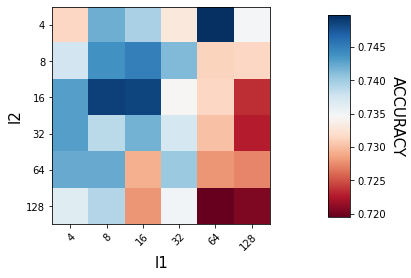

In [103]:
def make_heatmap(ax, gs, is_sh=False, make_cbar=False, cmap='GnBu'):
    results=cv_results
    scores_matrix = pd.pivot_table(data=cv_results.sort_values('mean_test_score', ascending=False),
                                   index='param_modelNN__l2', 
                                   columns='param_modelNN__l1',
                                   values='mean_test_score')
    im = ax.imshow(scores_matrix, cmap=cmap)
    z=results['mean_test_score']
    z_min, z_max = -np.abs(z).max(), np.abs(z).max()      
    ax.set_xticks(np.arange(len(l1)))
    ax.set_xticklabels([x for x in l1])
    ax.set_xlabel('l1', fontsize=15)  
    ax.set_yticks(np.arange(len(l2)))
    ax.set_yticklabels([x for x in l2])
    ax.set_ylabel('l2', fontsize=15)
    # Para girar las etiquetas de las marcas y establecer su alineación
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")  
    if make_cbar:
        fig.subplots_adjust(right=0.8)
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        cbar_ax.set_ylabel('ACCURACY', rotation=-90, va="bottom",
                           fontsize=15)

fig, axes = plt.subplots(ncols=1, sharey=True)
ax2 = axes

make_heatmap(ax2, gs2, make_cbar=True, cmap='RdBu')
#Otros valores de colormaps: 'GnBu', 'RdBu', 'viridis', 'cividis'

#ax2.set_title('Tiempo = '+tiempoTotal, fontsize=15)
plt.show()

<div id="EvaluacionModeloOptimizadoCVS" style="color:#106ba3"><h3>Evaluación de modelo optimizado: promedio de N experimentos</h3> </div>

Se carga el pipeline que contiene solamente los pasos de preparación de datos. Luego, se crea el modelo y se agrega al pipeline.

In [106]:
pipe=cargarPipeline(nombreArchivoPreprocesador)
X=copy.deepcopy(dataframe)

def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(cantidadVariablesIndependientes,), activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
    return model

estimator = KerasClassifier(model=build_model, verbose=0, batch_size=10, epochs=75)

pipe.steps.append(['modelNN',estimator])

numFolds=5
kfold = ShuffleSplit(n_splits=numFolds)

cvs=cross_val_score(pipe, X, Y, cv=kfold, n_jobs=-1)
print("Scores:")# accuracy
for i in range(numFolds):
    print(cvs[i])
print("Media de scores: ", cvs.mean())
accuracyModeloOptimizado = cvs.mean()

Scores:
0.72
0.78
0.8
0.78
0.73
Media de scores:  0.762


<div id="PrediccionConOptimizadoEvaluacionMetricas" style="color:#106ba3"><h3>Predicción modelo optimizado y evaluación de calidad: MAE, MSE, RMSE, Accuracy, Precision, Recall y F1</h3> </div>

In [13]:
pipe=cargarPipeline(nombreArchivoPreprocesador)
X=copy.deepcopy(dataframe)

def build_model():
    model = Sequential()
    model.add(Dense(64, input_shape=(cantidadVariablesIndependientes,), activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['acc'])
    return model

modeloOptimizado=build_model()

pipe.steps.append(['modelNN',modeloOptimizado])

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

pipe.fit(X_train, y_train, modelNN__batch_size=10, modelNN__epochs=75, modelNN__verbose=0)

guardarNN(modeloOptimizado,'modeloRedNeuronalOptimizada')

print('Modelo optimizado entrenado')

Guardando Red Neuronal en Archivo
Red Neuronal Grabada en Archivo
Modelo optimizado entrenado


In [11]:
y_pred = (pipe.predict(X_test) > 0.5).astype("int32")
y_pred=y_pred.flatten()# de 2D a 1D

dataframeFinal=pd.DataFrame({'real':y_test, 'predicción': y_pred})

np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})

dataframeFinal.tail(10)

7/7 [==============================] - 0s 2ms/step


,real,predicción
948,0,1
829,1,0
656,0,0
199,0,0
213,0,1
408,1,1
332,0,0
208,1,1
613,1,1
78,1,1


In [12]:
MAE=metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
accuracy=str(accuracy_score(y_test, y_pred))

accuracyModeloOptimizado= float(accuracy)

MAE=str(round(MAE, 4))
MSE=str(round(MSE, 4))
RMSE=str(round(RMSE, 4))

print('Mean Absolute Error (MAE):', MAE)  
print('Mean Squared Error (MSE):', MSE)  
print('Root Mean Squared Error (RMSE):', RMSE) 
print('Accuracy: ' + accuracy) 

print('Confusion_matrix:')
y_test_transformado = y_test
y_pred_transformado = y_pred

cm = confusion_matrix(y_test_transformado, y_pred_transformado)  
print(cm)  
tn, fp, fn, tp = confusion_matrix(y_test_transformado, y_pred_transformado).ravel()  
print(tn,fp,fn,tp)

precision=precision_score(y_test_transformado, y_pred_transformado)
precision=str(round(precision, 4))
print('Precision: ',precision)

recall=recall_score(y_test_transformado, y_pred_transformado)
recall=str(round(recall, 4))
print('Recall: ',recall)

f1=f1_score(y_test_transformado, y_pred_transformado)
f1=str(round(f1, 4))
print('F1:',f1)

Mean Absolute Error (MAE): 0.24
Mean Squared Error (MSE): 0.24
Root Mean Squared Error (RMSE): 0.4899
Accuracy: 0.76
Confusion_matrix:
[[ 36  23]
 [ 25 116]]
36 23 25 116
Precision:  0.8345
Recall:  0.8227
F1: 0.8286


<div id="comparacion-resultados" style="color:#106ba3"><h3>Comparación de modelos</h3> </div>

In [133]:
modeloBase=cargarNN('modeloRedNeuronalBase')
modeloOptimizado=cargarNN('modeloRedNeuronalOptimizada')

accuracyModeloBase=float(str(accuracyModeloBase))
accuracyModeloOptimizado=float(str(accuracyModeloOptimizado))
print('Accuracy Modelo Base: ',accuracyModeloBase)
print('Accuracy Modelo Optimizado: ',accuracyModeloOptimizado)
mejora=float(str(round((accuracyModeloOptimizado-accuracyModeloBase)*100,4)))

print('Mejora en %:',mejora)

Red Neuronal Cargada desde Archivo
Red Neuronal Cargada desde Archivo
Accuracy Modelo Base:  0.662
Accuracy Modelo Optimizado:  0.75
Mejora en %: 8.8


<div id="PrediccionNuevoElemento" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Fase 4: Predicción de nuevos samples (nuevos clientes)</h2> </div>

La siguiente función permite predecir si se aprueba o no un crédito a un nuevo cliente. En la función se define el valor por defecto de las variables, se crea el dataframe con los nuevos valores y los nombres de las variables. El método "predict" ejecuta el Pipeline: los pasos de transformación y la clasificación (mediante la red neuronal). Así se predice si el cliente es bueno (bajo riesgo -> 1) o malo (alto riesgo -> 0). 

Para desarrollar y desplegar este modelo como un servicio, se debe cargar el Pipeline de preprocesamiento, luego cargar la Red Neuronal e incorporar la Red Neuronal al Pipeline. Con ello, se podría realizar las predicciones para nuevos clientes.

In [111]:
#Esta es la función para calcular la certeza (confianza o probabilidad) asociada a la predicción de clase
def obtenerResultadosyCertezas(lista):
    predicciones=lista
    marcas=[]
    certezas=[]
    nuevomax=1
    nuevomin=0
    marca=-1
    certeza=-1
    for i in range(len(lista)):
        prediccion=lista[i]
        if (prediccion < 0.5):
            marca = 'No Otorgado'
            maxa=0.5
            mina=0
            certeza=1-((prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin)
            certeza=str(int((certeza)*100))+'%'
        elif (prediccion >= 0.5):
            marca = 'Otorgado'
            maxa=1
            mina=0.5
            certeza=(prediccion-mina)/(maxa-mina)*(nuevomax-nuevomin)+nuevomin
            certeza=str(int((certeza)*100))+'%'
        marcas.append(marca)
        certezas.append(certeza)
    return prediccion, marcas, certezas

In [112]:
def predecirNuevoCliente(ESTADOCUENTACORRIENTE='A12', PLAZOMESESCREDITO=6, HISTORIALCREDITO='A34', PROPOSITOCREDITO='A43',
                            MONTOCREDITO=1169, SALDOCUENTAAHORROS='A65', TIEMPOACTUALEMPLEO='A75', TASAPAGO=4, 
                            ESTADOCIVILYSEXO='A93', GARANTE='A101', TIEMPORESIDENCIAACTUAL=4, ACTIVOS='A121', EDAD=67, 
                            VIVIENDA='A152', CANTIDADCREDITOSEXISTENTES=2, EMPLEO='A173', CANTIDADPERSONASAMANTENER=2,
                            TRABAJADOREXTRANJERO='A201'):    
    cnames=['ESTADOCUENTACORRIENTE','PLAZOMESESCREDITO','HISTORIALCREDITO','PROPOSITOCREDITO','MONTOCREDITO',
            'SALDOCUENTAAHORROS','TIEMPOACTUALEMPLEO','TASAPAGO','ESTADOCIVILYSEXO','GARANTE','TIEMPORESIDENCIAACTUAL',
            'ACTIVOS','EDAD','VIVIENDA','CANTIDADCREDITOSEXISTENTES','EMPLEO','CANTIDADPERSONASAMANTENER',
            'TRABAJADOREXTRANJERO']
    Xnew=[ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,MONTOCREDITO,SALDOCUENTAAHORROS,
          TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,
          CANTIDADCREDITOSEXISTENTES,EMPLEO,CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO]
    Xnew_Dataframe = pd.DataFrame(data=[Xnew],columns=cnames)
    y_pred = pipe.predict(Xnew_Dataframe)[0].tolist()
    print(y_pred[0])
    #pred = (pred > 0.5).astype("int32")
    #pred = pred.flatten()[0]# de 2D a 1D
    predicciones, marcas, certezas= obtenerResultadosyCertezas(y_pred)
    dataframeFinal=pd.DataFrame({'Predicción':predicciones, 'Resultado':marcas, 'Certeza': certezas})
    np.set_printoptions(formatter={'float': lambda X: "{0:0.0f}".format(X)})
    return dataframeFinal

#Se carga el Pipeline de Preprocesamiento
pipe=cargarPipeline(nombreArchivoPreprocesador)
print('Pipeline de Preprocesamiento Cargado')
#Se carga la Red Neuronal
modeloOptimizado=cargarNN('modeloRedNeuronalOptimizada')
#Se integra la Red Neuronal al final del Pipeline
pipe.steps.append(['modelNN',modeloOptimizado])
print('Red Neuronal integrada al Pipeline')

Pipeline de Preprocesamiento Cargado
Red Neuronal Cargada desde Archivo
Red Neuronal integrada al Pipeline


**Predicciones para Nuevos Clientes:**

El **Cliente1** pide monto alto, tiene 4 personas a mantener, tiene 30 años.

In [113]:
ESTADOCUENTACORRIENTE='A12'
PLAZOMESESCREDITO=6
HISTORIALCREDITO='A34'
PROPOSITOCREDITO='A43'
MONTOCREDITO=116900
SALDOCUENTAAHORROS='A65'
TIEMPOACTUALEMPLEO='A75'
TASAPAGO=4
ESTADOCIVILYSEXO='A93'
GARANTE='A101'
TIEMPORESIDENCIAACTUAL=4 
ACTIVOS='A121'
EDAD=30
VIVIENDA='A152'
CANTIDADCREDITOSEXISTENTES=2
EMPLEO='A173'
CANTIDADPERSONASAMANTENER=4
TRABAJADOREXTRANJERO='A201'

print('Cliente1:')
dataframeFinal=predecirNuevoCliente(ESTADOCUENTACORRIENTE,PLAZOMESESCREDITO,HISTORIALCREDITO,PROPOSITOCREDITO,
                                          MONTOCREDITO,SALDOCUENTAAHORROS,TIEMPOACTUALEMPLEO,TASAPAGO,ESTADOCIVILYSEXO,GARANTE,
                                          TIEMPORESIDENCIAACTUAL,ACTIVOS,EDAD,VIVIENDA,CANTIDADCREDITOSEXISTENTES,EMPLEO,
                                          CANTIDADPERSONASAMANTENER,TRABAJADOREXTRANJERO)
dataframeFinal.head()

Cliente1:
1/1 [==============================] - 0s 86ms/step
0.3913061022758484


,Predicción,Resultado,Certeza
0,0.391306,No Otorgado,21%


El **Cliente2** pide monto bajo, tiene 2 personas a mantener, tiene 67 años (valores por defecto de la función 'predecirNuevoCliente')

In [114]:
print('Cliente2:')
dataframeFinal=predecirNuevoCliente()
dataframeFinal.head()

Cliente2:
1/1 [==============================] - 0s 32ms/step
0.9999983906745911


,Predicción,Resultado,Certeza
0,0.999998,Otorgado,99%


<div id="Conclusiones" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Conclusiones</h2> </div>

**Pipeline de Machine Learning:** En esta práctica, se aprendió a desarrollar y optimizar un clasificador de Redes Neuronales para predecir la idoneidad de un cliente para un crédito bancario. Para ello, se utilizó un Pipeline, una herramienta esencial que permite combinar transformadores y clasificadores, lo que simplifica la creación de modelos compuestos.

**Fases del Análisis de Datos:** El proceso se dividió en fases esenciales de análisis de datos. Comenzando por la preparación de los datos, se avanzó hacia la construcción del modelo de Red Neuronal y su optimización mediante el ajuste de hiperparámetros.

**Optimización y "Fine Tuning":** La optimización es clave para mejorar la precisión del modelo de Red Neuronal. La estrategia de "Fine Tuning" implica ajustar parámetros críticos, como el tamaño del lote (Batch Size) y la densidad de las capas de neuronas. Esto se logra mediante la experimentación y el uso de herramientas como "GridSearchCV." 

**Consideraciones Clave:** Las decisiones sobre el tamaño del lote y la densidad de las neuronas son cruciales en la creación de una red neuronal eficaz. El tamaño del lote influye en la precisión y la velocidad de entrenamiento, mientras que la densidad de neuronas afecta la capacidad de la red para abordar tareas complejas.

**Resultados:** El proceso de optimización y ajuste llevó a mejoras significativas en el rendimiento del modelo. Por ejemplo, la precisión del modelo mejoró en un 8.8%, lo que subraya la importancia de estos procesos.

**Uso Práctico:** El modelo final desarrollado puede utilizarse para predecir si se debe aprobar o rechazar un crédito a un nuevo cliente. El Pipeline de preprocesamiento y la Red Neuronal se pueden cargar y utilizar como un servicio para realizar predicciones en tiempo real.

En **resumen**, se destacó la importancia de utilizar un Pipeline en el desarrollo de modelos de Machine Learning, además de mostrar cómo el proceso de optimización puede conducir a mejoras sustanciales en el rendimiento del modelo. Los conceptos de Batch Size y densidad de neuronas se presentaron como consideraciones clave en la creación de Redes Neuronales efectivas. Se  proporcionó una visión general del proceso de "Fine Tuning" y se enfatizó la aplicación práctica del modelo resultante.

<div id="Referencias-enlaces" style="color:#37475a; border-bottom: 7px solid orange; width: 100%; margin-bottom: 15px; padding-bottom: 2px"><h2>Referencias y enlaces</h2> </div>

[1] Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

[2] El Naqa, I., & Murphy, M. J. (2015). What is machine learning?. In machine learning in radiation oncology (pp. 3-11). Springer, Cham.

[3] Duda, R. O., Hart, P. E., & Stork, D. G. (2012). Pattern classification. John Wiley & Sons.

[4] P. Joshi. (2017). Artificial intelligence with python. Packt Publishing Ltd.

[5] Brownlee. J. (2019, Agosto 12). A Tour of Machine Learning Algorithms [Machine Learning Mastery]. Recuperado de https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/

[6] S. Raschka, V. Mirjalili. (2007). Python Machine Learning, Packt Publishing Ltd.

[7] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[8] Müller, A. (2020). More on Pipelines. [Applied Machine Learning with Python]. Recuperado de https://amueller.github.io/aml/01-ml-workflow/12-pipelines-gridsearch.html

[9] Martinez, J. (2020). Precision, Recall, F1, Accuracy en clasificación [IArtificial.net]. Recuperado de https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/

**Enlaces de documentación de scikit-learn y matplotlib:**

https://keras.io/api

https://keras.io/api/optimizers

https://scikit-learn.org/stable/modules/cross_validation.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://stats.stackexchange.com/questions/405624/difference-between-cross-validation-gridsearchcv-and-does-cross-validation-refer

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

https://matplotlib.org/stable/tutorials/colors/colormaps.html